In [0]:
from google.colab import drive 
drive.mount('/content/drive')

In [0]:
import glob
import pickle
import numpy as np
from PIL import Image, ImageFilter, ImageDraw
pixelated_input= []
i = 0
nh=nw=10 
#nh=nw=30  #different intensity of pixelation
for img_path in glob.iglob('/content/drive/My Drive/lfw.tgz (Unzipped Files)/lfw/*/*.jpg'):
  img = Image.open(img_path)
  width, height = img.size
  w1=128
  h1=128
  left = (width - w1)//2
  top = (height - h1)//2
  right = (width + w1)//2
  bottom = (height + h1)//2 #cropping by fixing center of image, so as to only get a close up of the face 
  img = img.crop((left, top, right, bottom))
  small_img = img.resize((nh,nw),resample=Image.BILINEAR)
  pixelated = small_img.resize(img.size,resample=Image.NEAREST)  
  del img
  pixelated_input.append(np.array(pixelated))  
  i += 1

pixelated_input = np.array(pixelated_input, dtype='float') / 255.0

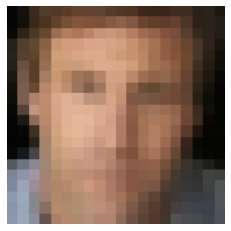

In [0]:
import matplotlib.pyplot as plt
plt.axis('off')
plt.imshow(pixelated_input[0])

Divde and dump as pickle files (the whole array cannot be dumped at once due to memory constraints)

In [0]:
part1 = pixelated_input[:int(1/6*(len(pixelated_input)))]
part2 = pixelated_input[int(1/6*(len(pixelated_input))):int(2/6*(len(pixelated_input)))]
part3 = pixelated_input[int(2/6*(len(pixelated_input))):int(3/6*(len(pixelated_input)))]
part4 = pixelated_input[int(3/6*(len(pixelated_input))):int(4/6*(len(pixelated_input)))]
part5 = pixelated_input[int(4/6*(len(pixelated_input))):int(5/6*(len(pixelated_input)))]
part6 = pixelated_input[int(5/6*(len(pixelated_input))):]

In [0]:
print(len(part6))

2206


In [0]:
with open('/content/drive/My Drive/Pickle/pixelated.pickle10', 'wb') as f:
    pickle.dump(part1, f)
with open('/content/drive/My Drive/Pickle/pixelated.pickle10', 'ab') as f:
    pickle.dump(part2, f)
with open('/content/drive/My Drive/Pickle/pixelated.pickle10', 'ab') as f:
    pickle.dump(part3, f)
with open('/content/drive/My Drive/Pickle/pixelated.pickle10', 'ab') as f:
    pickle.dump(part4, f)
with open('/content/drive/My Drive/Pickle/pixelated.pickle10', 'ab') as f:
    pickle.dump(part5, f)
with open('/content/drive/My Drive/Pickle/pixelated.pickle10', 'ab') as f:
    pickle.dump(part6, f)